# Implementação do Gradiente Descendente 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Criando dados para teste
X = 2 * np.random.rand(100, 1)
y = 10 + 50.2 * X + np.random.randn(100, 1)

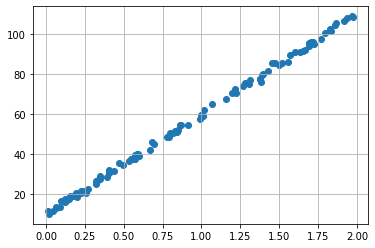

In [3]:
plt.scatter(X,y)
plt.grid()

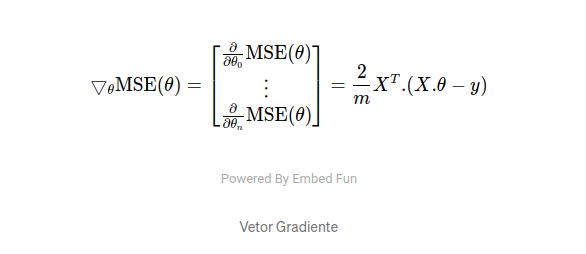

In [4]:
from IPython.display import display
from PIL import Image
img = Image.open('vetor_gradiente.png')
display(img)

## GD em batch

In [5]:
m = len(y) # nº de registros
eta = 0.1 # taxa de aprendizado
n_iterations = 1000 # quantidade de iteração do GD
X_b = np.c_[np.ones((100,1)),X] # Adiciona a variável constante da equação "theta0"
theta = np.random.randn(2,1) # valor inicial aleatório para os coeficientes


for iteration in range(n_iterations):
    # Gradiente da função erro
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    
    # Atualização dos Pesos
    theta = theta - eta*gradient
    
print(theta)

[[10.02676477]
 [50.07083921]]


## GD Mini-Batch - ( mini lotes)

o GD em Minilotes utiliza pequenos conjuntos aleatórios de dados chamados minilotes para obter os gradientes. Como resultado, o GD em Minilotes é mais regular do que o GD Estocástico, ficando mais próximo do mínimo.

In [6]:
n_iterations = 50
minibatch_size = 20 # tamanho dos minilotes

theta = np.random.randn(2, 1) #inicialização aleatória dos coeficientes
t0, t1 = 200, 1000

def learning_schedule(t): #cronograma de aprendizado
    return t0/(t+t1)

t = 0

for iteration in range(n_iterations):
    shuffled_ind = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_ind]
    y_shuffled = y[shuffled_ind]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

print(theta)

[[ 9.88278391]
 [49.91893639]]


## GD Estocastico 

In [7]:
n_iter = 50
t0, t1 = 5, 50 #hiperparâmetros de aprendizado

def learning_schedule(t): #cronograma de aprendizado
    return t0/(t+t1)

theta = np.random.randn(2,1) #inicialização aleatória

for ite in range(n_iter):
    for i in range(m):
        random_index = np.random.randint(m) #obtém instância aleatória
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(ite * m + i)
        theta = theta - eta * gradients
        
print(theta)

[[ 9.95896925]
 [50.06912228]]


## GD em batch com uma early stopping para a regressão softmax 

https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

In [33]:
# Importanto dataset para exemplo
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, 3:] # largura da petala
y = (iris['target'] == 2).astype('int')

In [9]:
print(X.shape)
print(y.shape)

(150, 1)
(150,)


In [23]:
import math

# Função logistica
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def softmax(logits):
    exps = np.exp(logits)
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred)) / n_samples


In [28]:
def softmax_regression(X, y, learning_rate=0.01, n_epochs=1000, tol=1e-5, early_stopping=True, validation_fraction=0.1):
    n_rows, n_cols = X.shape
    n_classes = len(np.unique(y))
    
    # Adicionar coluna de bias
    X_b = np.c_[np.ones(n_rows), X]
    
    # Dividir o conjunto em treino e validação
    if early_stopping:
        validation_size = int(n_rows * validation_fraction)
        train_size = n_rows - validation_size
        X_train, X_val = X_b[:train_size], X_b[train_size:]
        y_train, y_val = y[:train_size], y[train_size:]
    else:
        X_train, y_train = X_b, y
    
    # Inicializar os pesos
    W = np.random.uniform(low=-1.0, high=1.0, size=n_classes).reshape(-1,1)
    
    # Treinar o modelo
    best_loss = np.inf
    no_improvement_count = 0
    for epoch in range(n_epochs):
        y_pred_train = softmax(X_train.dot(W))
        
        # Atualizar os pesos usando gradiente descendente em batch
        gradients = 1 / X_train.shape[0] * X_train.T.dot(y_pred_train - y_train.reshape(-1,1))
        W -= learning_rate * gradients
        
        if early_stopping:
            logits_val = np.dot(X_val, W)
            y_pred_val = softmax(logits_val)
            loss_val = cross_entropy_loss(y_val, y_pred_val)
            
            if loss_val < best_loss - tol:
                best_loss = loss_val
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                
            if no_improvement_count >= 5:
                print(f"Early stopping after epoch {epoch}")
                break
                
    return W


In [29]:
softmax_regression(X,y)

Early stopping after epoch 5


array([[ 0.12740829],
       [-0.99497396]])

In [24]:
n_rows, n_cols = X.shape
n_classes = len(np.unique(y))
X_b = np.c_[np.ones(n_rows), X]
W = np.random.uniform(low=-1.0, high=1.0, size=n_classes).reshape(-1,1)
y_pred_train = softmax(X_b.dot(W))

In [25]:
y_pred_train.shape

(150, 1)

In [22]:
W.shape

(2, 1)

## Solução do livro: 

In [35]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [31]:
# add the bias 
X_with_bias = np.c_[np.ones([len(X), 1]), X]
np.random.seed(2042)

In [ ]:
np.random.seed(2042)

In [38]:
# Fazendo a separação dos dados em dados de treinamento, teste e validação sem usar o sklearn
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [43]:
np.unique(y_train)

array([0, 1, 2])

A variável target possui 3 classes, 0, 1 e 2. Precisamos da classes em formato de probabilidade para treinar o softmax, isso requer que transformemos os dados das classes da variável target numa matrix de one-hot-encoder.

In [57]:
# Função para transformar one-hot-encoding
def to_one_hot(y):
    n_classes = len(np.unique(y))
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [52]:
y_train[:10]

array([0, 0, 2, 1, 0, 2, 0, 0, 0, 2])

In [55]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [58]:
# Transformando os dados de treino, teste e validação para a variável alvo y 
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [59]:
# Implementando a função softmax
def softmax(logits): 
    exps = np.exp(logits)
    return exps / np.sum(exps, axis=1, keepdims=True)

In [60]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [81]:
# Fazendo a implementação do treinamento
eta = 0.01 # Taxa de aprendizado
n_iterations = 5000 
m = len(X_train)
epsilon = 1e-7 # alvo para o valor do erro de validação

Theta = np.random.randn(n_inputs, n_outputs) # Criando os coeficientes de inicialização

for iteration in range(n_iterations):
    Y_proba = softmax(X_train.dot(Theta))
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon), axis=1)) # Função de custo
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradient = 1/m * X_train.T.dot(error)
    Theta = Theta - eta*gradient
    

0 1.6607689507651262
500 0.7278362755267094
1000 0.6269051870031723
1500 0.5600080337983081
2000 0.5117065997303581
2500 0.47475346124919987
3000 0.445331818245912
3500 0.4212218871072836
4000 0.4010274049582099
4500 0.38381579829431745


In [82]:
# O softmax foi treinado, olhemos os parametros Theta ( são os parametros do modelo)
Theta

array([[ 3.4272322 , -0.501023  , -3.40222018],
       [-0.76216731,  0.38726994,  0.60104997],
       [-1.04990764,  0.07771718,  1.30418825]])

In [86]:
# vamos fazer a previsão sobre os dados de validação e verificar a acurácia do modelo
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [85]:
y_predict

array([0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 1, 0, 0, 2, 0, 2, 2])

In [92]:
Y_proba[2]

array([0.03895924, 0.51974296, 0.4412978 ])

In [93]:
y_predict[2]

1

Conforme observado acima, uma vez treinado os parametros do modelo Theta ( os coeficientes) através do gradiente decedente nesse caso por batch. Fazemos a predição com os dados de validação. O resultado é uma matrix de probabilidade para cada classe dado o registro. A função argmax portanto pega o indice que representa a classe que tem a maior probabilidade e retorna, criando assim o y_predict com um array contendo a representação da classe efetiva através do link de seus respectivos indices. 

In [96]:
# Agora vamos adicionar a regularização por early stopping. 
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    Y_proba = softmax(X_train.dot(Theta))
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 1.8978991686822577
500 0.5322966032216172
1000 0.510055213283792
1500 0.5045594066258349
2000 0.5031466284313443
2389 0.5029622412622952
2390 0.5029622429635099 early stopping!


In [97]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

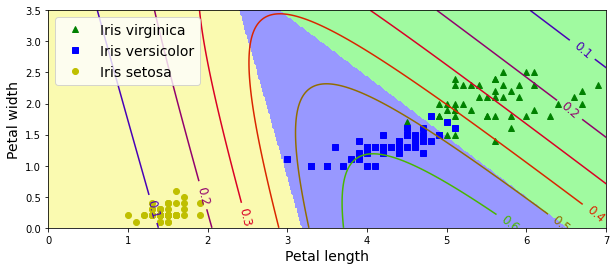

In [98]:
# Agora plotando o modelo de predição sobre os dados do dataset
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [99]:
# Fazendo a avaliação do modelo final sobre os dados de teste
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

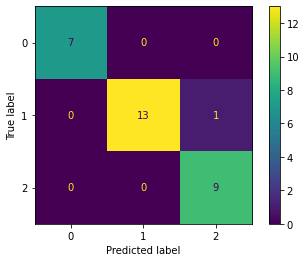

In [103]:
confusion_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()